<a href="https://colab.research.google.com/github/BHUVAN-005/-SENTIMENT-ANALYSIS-WITH-NLP/blob/main/SENTIMENT__ANALYSIS_WITH_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis using TF-IDF and Logistic Regression
# Dataset: Amazon Fine Food Reviews
# Task: CODTECH Internship - Task 2
# Done By:K Naga Santosh Sai Bhuvan

# Step 1: Install & Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Step 2: Load Dataset (upload it or use local path in Colab)

In [5]:
df = pd.read_csv('Reviews.csv')
df = df[['Text', 'Score']].dropna()


#  Step 3: Create Sentiment Labels

In [6]:
def label_sentiment(score):
    if score <= 2:
        return 0  # Negative
    elif score >= 4:
        return 1  # Positive
    else:
        return -1  # Neutral

df['Sentiment'] = df['Score'].apply(label_sentiment)
df = df[df['Sentiment'] != -1]
df = df.sample(10000, random_state=42)

#  Step 4: Preprocessing Function

In [7]:
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)  # remove HTML tags
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)  # remove punctuation
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

df['CleanText'] = df['Text'].apply(preprocess)


#  Step 5: Vectorization (TF-IDF)

In [8]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['CleanText'])
y = df['Sentiment']

#  Step 6: Split Data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#  Step 7: Train Logistic Regression

In [10]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

#  Step 8: Evaluation

In [11]:
y_pred = model.predict(X_test)

print("📈 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🧾 Classification Report:\n", classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))
print("🧩 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

📈 Accuracy: 0.876

🧾 Classification Report:
               precision    recall  f1-score   support

    Negative       0.91      0.27      0.42       327
    Positive       0.87      0.99      0.93      1673

    accuracy                           0.88      2000
   macro avg       0.89      0.63      0.67      2000
weighted avg       0.88      0.88      0.85      2000

🧩 Confusion Matrix:
 [[  88  239]
 [   9 1664]]


# Plot Confusion Matrix

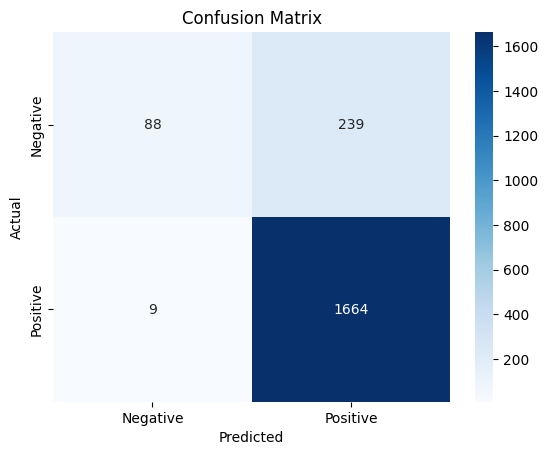

In [12]:

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()